# Compare the difference between CITS and CIMs alone
This notebook showcases SF3B4, U2 density around branchpoints

In [1]:
# set up files associated with each genome coordinates
import metadensity as md
md.settings.from_config_file('/home/hsher/projects/Metadensity/config/hg38.ini')


# then import the modules
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# I have a precompiles list of ENCODE datas as a csv that loads in this dataloader
import sys
sys.path.append('/home/hsher/projects/Metadensity/scripts')
from dataloader import *
%matplotlib inline

plt.style.use('seaborn-white')

please set the right config according to genome coordinate
Using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3


## load RBPs into eCLIP object

In [2]:
SF3B4 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'SF3B4')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)


In [3]:
clips = [SF3B4]

# Here we compare the different between using CITs and CIMs in eCLIP

In [4]:
m_all = Metatruncate(SF3B4, 'SF3B4 CITS+CIMS',background_method = 'relative information', 
                     normalize = False)
m_all.get_density_array(use_truncation = True)

Using: /home/hsher/projects/Metadensity/metadensity/data/hg38/gencode
Done building metagene


In [5]:
m_cits = Metatruncate(SF3B4, 'SF3B4 CITS',background_method = 'relative information', 
                     normalize = False, **{'included_diagnostic_events':['trun']})
m_cits.get_density_array(use_truncation = True)

Using: /home/hsher/projects/Metadensity/metadensity/data/hg38/gencode
Done building metagene


In [6]:
m_cims = Metatruncate(SF3B4, 'SF3B4 CIMS',background_method = 'relative information', 
                     normalize = False, **{'included_diagnostic_events':['mismatch']})
m_cims.get_density_array(use_truncation = True)

Using: /home/hsher/projects/Metadensity/metadensity/data/hg38/gencode
Done building metagene


In [7]:
den = [m_cits, m_cims, m_all]

## Visualize RBP map: individual density per transcript

use `feature_to_show` to decide what features to show. 

/projects/ps-yeolab3/hsher/Metadensity/metadensity/plotd.py:187: RuntimeWarning: Mean of empty slice
  density_concat = np.nanmean(np.stack([den_arr[feat,align, r] for r in m.eCLIP.rep_keys]), axis = 0)


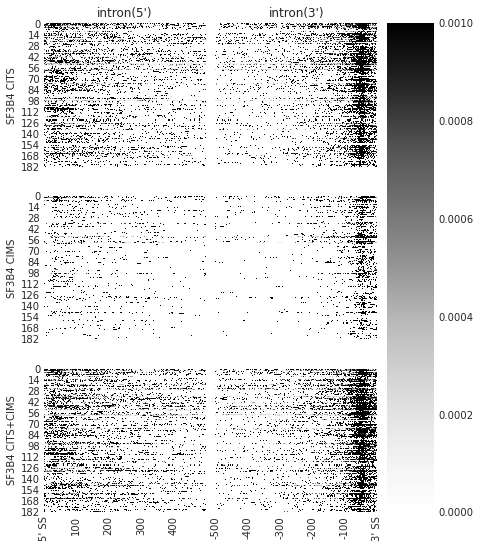

In [8]:
### PLOT INDIVIDUAL TRUNCATION SITES

f = plot_rbp_map(den, features_to_show = ['intron'], cmap = 'Greys')

# Median and Mean density

In [9]:
color_dict = {'SF3B4 CITS+CIMS':'mediumpurple', 'SF3B4 CITS': 'cornflowerblue', 'SF3B4 CIMS':'lightcoral'}

Text(0, 0.5, 'mean relative information')

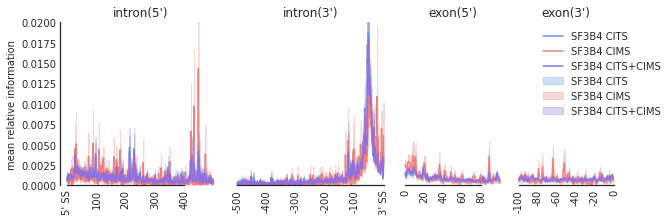

In [10]:
f=plot_mean_density(den,
                    features_to_show = ['intron', 'exon'], ymax = 0.02,color_dict = color_dict)
f=beautify(f, offset = 0) # sns.despine 
f.get_axes()[0].set_ylabel('mean relative information')

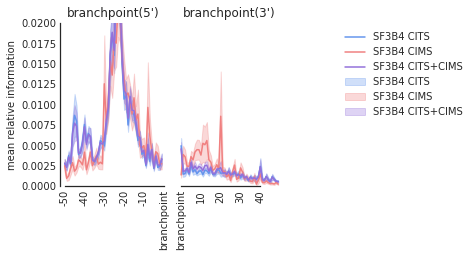

In [11]:

f=plot_mean_density(den,
                    features_to_show = ['branchpoint'], ymax = 0.02,color_dict = color_dict
                   )
f.get_axes()[0].set_ylabel('mean relative information')
f=beautify(f, offset = 0) # sns.despine 
f.savefig('SF3B4_br.svg', dpi = 300)